<a href="https://colab.research.google.com/github/dcownden/PerennialProblemsOfLifeWithABrain/blob/split-and-simple-perturb/sequences/draft_sequences/perturbation_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we explore the convergence properties of two different weight perturbation update rules, one uses the 'raw' parameterwise correlations between reward change and parameter perturbation, the other uses a "proper" fitting of the hyperplane passing through the test point.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=2021)

In [62]:
def z(x, y):
  return x**2 - y**2

def perturb_and_eval(x, y, sigma):
  perturbation = rng.normal(0, sigma, size=2)
  delta_x = perturbation[0]
  delta_y = perturbation[1]
  perturbed_x = x + delta_x
  perturbed_y = y + delta_y
  perturbed_z = z(perturbed_x, perturbed_y)
  delta_z = perturbed_z - z(x, y)
  test = (perturbed_x, perturbed_y, perturbed_z)
  delta = (delta_x, delta_y, delta_z)
  return test, delta

In [63]:
perturb_and_eval(4, 0, 0.1)

((4.052683452496588, -0.1334548584593563, 16.406432966893252),
 (0.05268345249658818, -0.1334548584593563, 0.40643296689325226))

In [80]:
tests = []
deltas = []
for i in range(10):
  test, delta = perturb_and_eval(4, 0, 1.0)
  tests.append(test)
  deltas.append(delta)

In [81]:
delta_a = np.array(deltas)

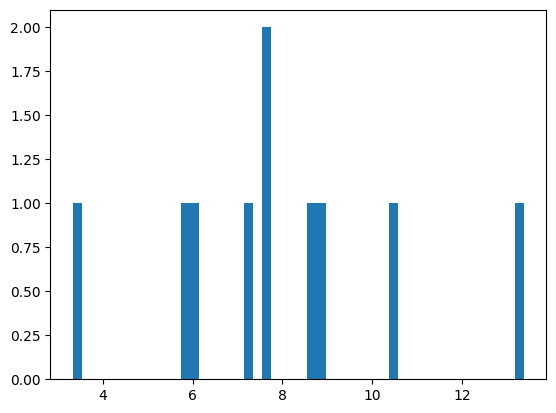

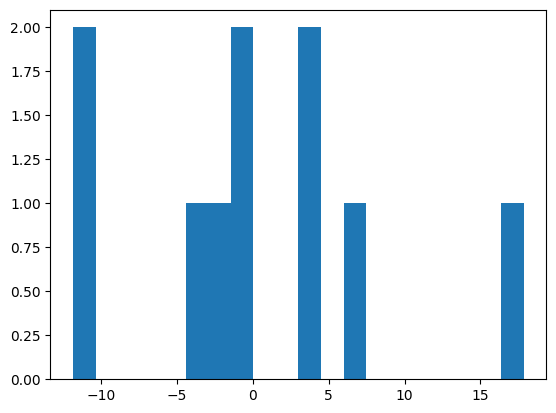

In [82]:
naive_est_x = delta_a[:,2] / delta_a[:,0]
naive_est_y = delta_a[:,2] / delta_a[:,1]
plt.hist(naive_est_x, bins=50)
plt.show()
plt.hist(naive_est_y, bins=20)
plt.show()

In [83]:
print(np.mean(naive_est_x))
print(np.mean(naive_est_y))

7.8981587354059855
-0.16586133306908418


In [ ]:
def z(x, y):
  return -5 * x**2 - 3 * y**2 + x * y)

def dz(x, y):
  return (-10 * x + y, -6 * y + x)

def perturb(x, y, sigma):
  perturbation = rng.normal(0, sigma, size=2)
  return x + perturbation[0], y + perturbation[1]

def perturb_and_eval(x, y, sigma):
  perturbation = rng.normal(0, sigma, size=2)
  delta_x = perturbation[0]
  delta_y = perturbation[1]
  perturbed_x = x + delta_x
  perturbed_y = y + delta_y
  perturbed_z = z(perturbed_x, perturbed_y)
  delta_z = z(x, y) - perturbed_z
  return delta_x, delta_y, delta_z

def avg_est1(delta_x1, delta_y1, delta_z1):
  x_update = delta_z1 / delta_x1
  y_update = delta_z1 / delta_y1
  return x_update, y_update

def avg_est2(delta_x1, delta_y1, delta_z1, delta_x2, delta_y2, delta_z2):
  x_update = (delta_z1/delta_x1 + delta_z2/delta_x2) / 2
  y_update = (delta_z1/delta_y1 + delta_z2/delta_y2) / 2
  return x_update, y_update

def fit_est(delta_x1, delta_y1, delta_z1, delta_x2, delta_y2, delta_z2):
  x_update = (delta_y1 * delta_z2 - delta_z1 * delta_y2) /
             (delta_x1 * delta_y2 - delta_x2 * delta_y1)
  y_update = (delta_x1 * delta_z2 - delta_z1 * delta_x2) /
             (delta_x1 * delta_y2 - delat_x2 * delta_y1)
  return x_update, y_update

In [23]:
def z(x, y):
    return -5 * x**2 - 3 * y**2 + x * y

def dz(x, y):
    return (-10 * x + y, -6 * y + x)

def perturb_and_eval(x, y, sigma):
    perturbation = rng.normal(0, sigma, size=2)
    delta_x = perturbation[0]
    delta_y = perturbation[1]
    perturbed_x = x + delta_x
    perturbed_y = y + delta_y
    perturbed_z = z(perturbed_x, perturbed_y)
    delta_z = perturbed_z - z(x, y)
    return delta_x, delta_y, delta_z

def avg_est1(delta_x, delta_y, delta_z):
    if delta_x == 0 or delta_y == 0:
        return None
    x_update = delta_z / delta_x
    y_update = delta_z / delta_y
    return x_update, y_update

def avg_est2(delta_x1, delta_y1, delta_z1, delta_x2, delta_y2, delta_z2):
    if delta_x1 == 0 or delta_y1 == 0 or delta_x2 == 0 or delta_y2 == 0:
        return None
    x_update = ((delta_z1 / delta_x1) + (delta_z2 / delta_x2)) / 2
    y_update = ((delta_z1 / delta_y1) + (delta_z2 / delta_y2)) / 2
    return x_update, y_update

def fit_est(delta_x1, delta_y1, delta_z1, delta_x2, delta_y2, delta_z2):
    denominator = (delta_x1 * delta_y2 - delta_x2 * delta_y1)
    if denominator == 0:
        return None
    x_update = (delta_y1 * delta_z2 - delta_z1 * delta_y2) / denominator
    y_update = (delta_z1 * delta_x2 - delta_x1 * delta_z2) / denominator
    return x_update, y_update

# Parameters
sigma = 0.1
n_samples = 1000
true_x, true_y = dz(1, 1) # True derivatives at the point (1,1)

# Storage for estimates
estimates1 = []
estimates2 = []
estimates_fit = []

for _ in range(n_samples):
    delta_x1, delta_y1, delta_z1 = perturb_and_eval(1, 1, sigma)
    delta_x2, delta_y2, delta_z2 = perturb_and_eval(1, 1, sigma)

    est1 = avg_est1(delta_x1, delta_y1, delta_z1)
    est2 = avg_est2(delta_x1, delta_y1, delta_z1, delta_x2, delta_y2, delta_z2)
    est_fit = fit_est(delta_x1, delta_y1, delta_z1, delta_x2, delta_y2, delta_z2)

    if est1:
        estimates1.append(est1)
    if est2:
        estimates2.append(est2)
    if est_fit:
        estimates_fit.append(est_fit)

# Convert to numpy arrays for easier manipulation
estimates1 = np.array(estimates1)
estimates2 = np.array(estimates2)
estimates_fit = np.array(estimates_fit)


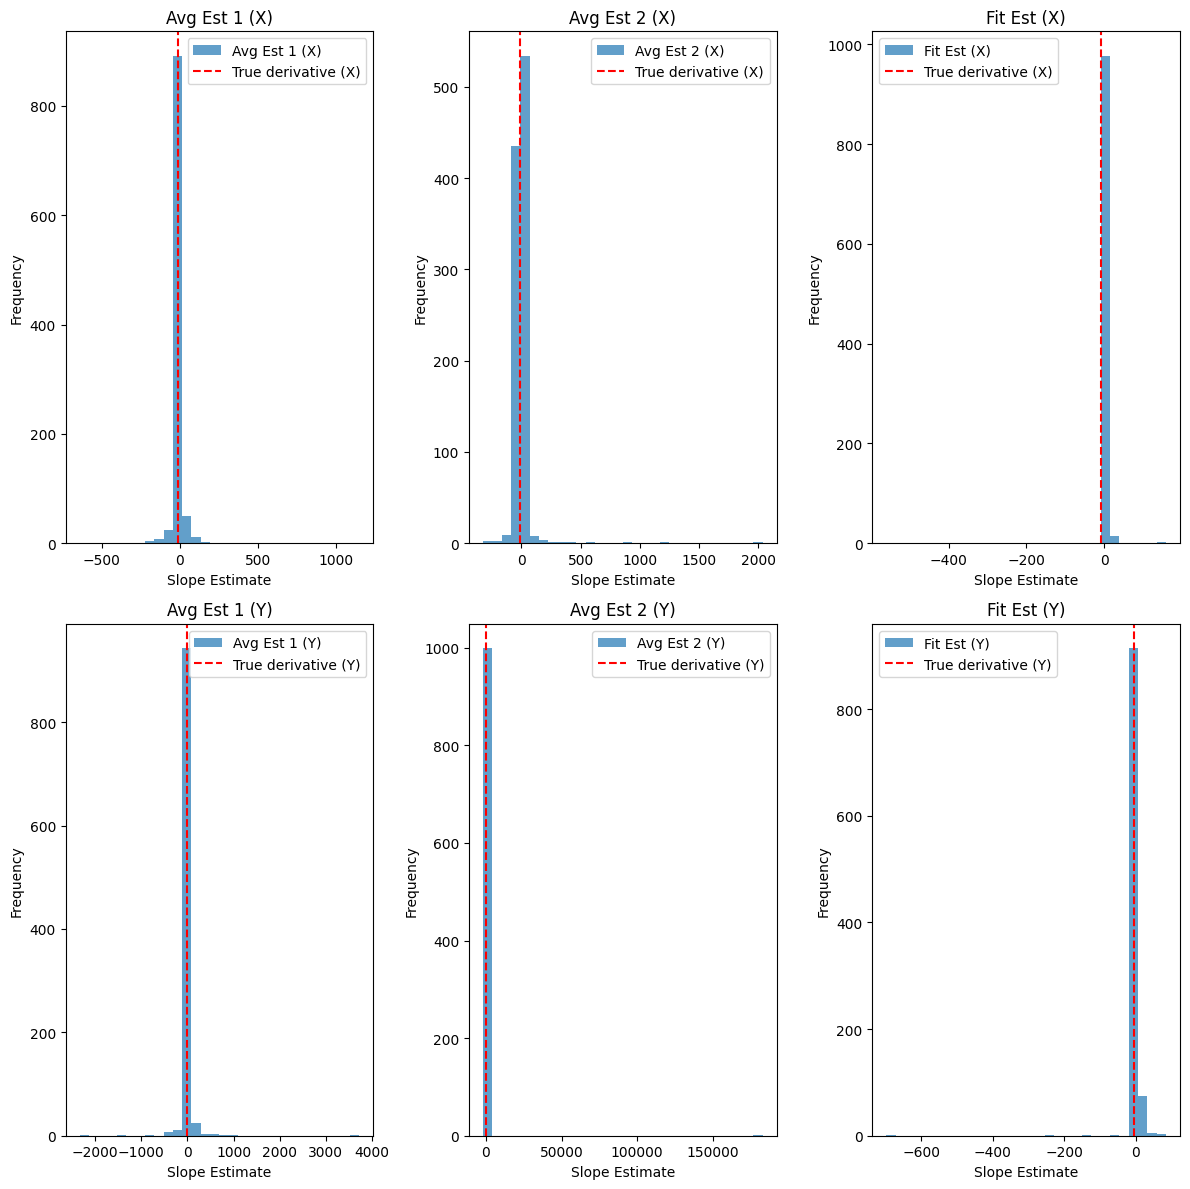

In [24]:
# Adjusted plotting with separate histograms for better visibility
fig, axs = plt.subplots(2, 3, figsize=(12, 12),)  # 2 rows for X and Y, 3 columns for each estimation method

# Plotting for X slope estimates
axs[0, 0].hist(estimates1[:, 0], bins=30, alpha=0.7, label='Avg Est 1 (X)')
axs[0, 0].axvline(x=true_x, color='r', linestyle='--', label='True derivative (X)')
axs[0, 0].set_title('Avg Est 1 (X)')
axs[0, 0].legend()

axs[0, 1].hist(estimates2[:, 0], bins=30, alpha=0.7, label='Avg Est 2 (X)')
axs[0, 1].axvline(x=true_x, color='r', linestyle='--', label='True derivative (X)')
axs[0, 1].set_title('Avg Est 2 (X)')
axs[0, 1].legend()

axs[0, 2].hist(estimates_fit[:, 0], bins=30, alpha=0.7, label='Fit Est (X)')
axs[0, 2].axvline(x=true_x, color='r', linestyle='--', label='True derivative (X)')
axs[0, 2].set_title('Fit Est (X)')
axs[0, 2].legend()

# Plotting for Y slope estimates
axs[1, 0].hist(estimates1[:, 1], bins=30, alpha=0.7, label='Avg Est 1 (Y)')
axs[1, 0].axvline(x=true_y, color='r', linestyle='--', label='True derivative (Y)')
axs[1, 0].set_title('Avg Est 1 (Y)')
axs[1, 0].legend()

axs[1, 1].hist(estimates2[:, 1], bins=30, alpha=0.7, label='Avg Est 2 (Y)')
axs[1, 1].axvline(x=true_y, color='r', linestyle='--', label='True derivative (Y)')
axs[1, 1].set_title('Avg Est 2 (Y)')
axs[1, 1].legend()

axs[1, 2].hist(estimates_fit[:, 1], bins=30, alpha=0.7, label='Fit Est (Y)')
axs[1, 2].axvline(x=true_y, color='r', linestyle='--', label='True derivative (Y)')
axs[1, 2].set_title('Fit Est (Y)')
axs[1, 2].legend()

for ax in axs.flat:
    ax.set(xlabel='Slope Estimate', ylabel='Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
np.mean(estimates1, axis=0)

array([-7.13074488, -2.65335192])

In [29]:
np.mean(estimates2, axis=0)

array([ -2.86046016, 173.36696992])

In [28]:
np.mean(estimates_fit, axis=0)

array([8.72941028, 4.28570164])

In [21]:
true_x, true_y = dz(1, 1)

In [22]:
print(true_x, true_y)

-9 -5


In [3]:
import numpy as np

# Generate sample data for X and Y
np.random.seed(42) # For reproducibility
X = np.random.normal(0, 1, 10000) # 100 data points from a normal distribution for X
Y = np.random.normal(0, 1, 10000) # 100 data points from a normal distribution for Y

# Calculate Z = X^2 + Y^2
Z = X**2 + Y**2

# Calculate the sample means
mean_X = np.mean(X)
mean_Y = np.mean(Y)
mean_Z = np.mean(Z)

# Calculate the covariance between X and Z, and Y and Z
cov_XZ = np.mean((X - mean_X) * (Z - mean_Z))
cov_YZ = np.mean((Y - mean_Y) * (Z - mean_Z))

# Calculate the standard deviations of X, Y, and Z
std_X = np.std(X, ddof=1)
std_Y = np.std(Y, ddof=1)
std_Z = np.std(Z, ddof=1)

# Calculate the correlation coefficients
corr_XZ = cov_XZ / (std_X * std_Z)
corr_YZ = cov_YZ / (std_Y * std_Z)

corr_XZ, corr_YZ


(0.0012805082469408546, 0.011490461229968668)

In [31]:
x_corr_hist = []
y_corr_hist = []

for ii in range(10000):
  dX = np.random.normal(0, 1, 1) # 100 data points from a normal distribution for X
  dY = np.random.normal(0, 1, 1) # 100 data points from a normal distribution for Y
  dZ = dX**2 + dY**2

  naive_est_x = dZ / dX
  naive_est_y = dZ / dY

  X = np.concatenate((dX, [0]))
  Y = np.concatenate((dY, [0]))
  Z = X**2 + Y**2

  # Calculate the sample means
  mean_X = np.sum(X) / len(X)
  mean_Y = np.sum(Y) / len(Y)
  mean_Z = np.sum(Z) / len(Z)

  # Calculate the covariance between X and Z, and Y and Z
  cov_XZ = np.mean((X - mean_X) * (Z - mean_Z))
  cov_YZ = np.mean((Y - mean_Y) * (Z - mean_Z))

  # Calculate the standard deviations of X, Y, and Z
  std_X = np.std(X, ddof=1)
  std_Y = np.std(Y, ddof=1)
  std_Z = np.std(Z, ddof=1)

  # Calculate the correlation coefficients
  corr_XZ = cov_XZ / (std_X * std_Z)
  corr_YZ = cov_YZ / (std_Y * std_Z)

  x_corr_hist.append(corr_XZ)
  y_corr_hist.append(corr_YZ)
  #print(ii)
  #print(np.mean(x_hist))
  #print(np.mean(y_hist))

In [32]:
print(np.mean(x_hist))
print(np.mean(y_hist))

0.004461538461538461
-0.003076923076923077



In a given learning episode one of four cases can occur:

1. Prey is present, given the sensory input the organisms strikes, a positive reward is obtained
2. Prey is not present, given the sensory input the organism strikes, a negative reward is obtained
3. Prey is present, given the sensory input the organism does not strike, no reward is obtained
4. Prey is not present, given the sensory input the organism does not strike, no reward is obtained

We have the (initial) caveat that from the perspective of the organisms cases 3 and 4 are identical, so the parameter update rule must also be identical in each of those cases.

It has been noted and proposed many times that the inherent stochasticity of synaptic firing might provide a kind of natural 'guess' and allow for this kind of learning to be implemented in the brain, [citations]. Empirical evidence for this kind of learning is also begining to accumulate [citations].

The basic idea is as follows. Due to the stochastic spiking of neurons, in any given episode of senosry input -> behaviour production -> contingent reward, some but not all of the synaptic weights are causally implicated in the production of the behaviour (and consequent reward). When a good thing happens, synaptic connections that were involved in the generation of the behaviour should be strengthened, and conversely when bad things happen synaptic connections that were involved in the generation of the behaviour should be weakened. Synaptic connections that were not involved in producing the behaviour should be left unchanged. Zooming in to the synaptic level the four cases above are expanded as follows:

1. Both input and output neurons spike, a good thing happens
2. Both input and output neurons spike, a bad thing happens
3. Input neuron spikes but output neuron doesn't spike, a neutral thing happens
4. Input neuron doesn't spike, output neuron spikes, a good thing happens
5. Input neuron doesn't spike, output neuron spikes, a bad thing happens
6. Neither input nor output neuron spikes, a neutral thing happens.

In this our first and most simple (from a physiological mechanism perspective, actually a bit complicated from a mathematical description perspective), only in the first two cases, when both the pre- and post- synaptic neurons fire, is the synapse causally implicated in the reward outcome. So our rule needs to prescribe no change, unless both pre- and post- synaptic neurons have fired. If a good thing happens, then the connection should be reinforced, and if a bad thing happens then the connection should be weakened. Our learning rule written to echo and presiage the 'REINFORCE' formulation of Williams (1992), and also Resrola Wagnar rule, and also TD formulations. In some sense this is cannonical form of learning rules is.

$$\Delta w_i = \alpha \cdot (r - b) \cdot s_i \cdot s_o$$

Almost every learning rule for parameters that we look at will be roughly composed of these three factors: learning rate, error, eligibility. The first factor is positive learning rate or step size parameter of the learning process. In this specific case $\alpha$ is constant, but it could be made contingent on various factors in more complicated models, e.g. learning rates often start high and are lowered as the learning system gets more 'dialed in'. The second part is an 'error' term, in this case a 'reward prediction error', $(r-b)$, gives the way in which the actual received reward $r$ differs from some baseline expectation. Again in more complicated learning rules $b$ could be made contingent on many factors, and this contingency of $b$ on other factors might itself be learned. Here though, we assume a constant expected reward, $b=0$, so we can think of $b$ as an expectation of how good the world is on average, if the organism is performing as well as expected. We imagine that parameters like $\alpha$ and $b$ are set and tuned by evolution to ensure effective learning. Lastly, in this simple model the $s_i \cdot s_o$ term is the 'eligibility' of the synapse for change. In general, this will be some measure of how causally implicated the particular parameter $w_i$ is in causing the received reward. Here we use one of the simplest possible eligibility terms, which takes the value one only when both pre- and post- synaptic neurons fire, and is otherwise zero. Again in more complicated learning rules, this eligibility term could be more complicated, e.g. it might incorporate knowledge of the structure of the network producing the behaviour, often in the form of a gradient, to further modulate the strength and direction of the weight change. Note, $w_i$ is the $i^{\text{th}}$ element of $\mathbf{W}$ and $s_i$ and $s_o$ are the realized spikes during the episode for the $i^{\text{th}}$ input neuron and the output neuron respectively. Okay, let's implement and see how well this works!

We model this creature's sensory-behaviour system as follows. Let $\mathbf{x}$ be the raw sensory input vector in a given episode. We imagine that each element of $\mathbf{x}$, denoted $x_i$ corresponds to the activation level of a single photosensitive neuron. These activation levels might be losely interpreted as firing rates. This input neurons are then connected by synapses to a single output neuron. The activation level of this output neuron is computed as
$$y = \mathbf{Wx}$$
Here, $\mathbf{W}$ is the matrix of synaptic weights between the input neurons and the output neuron (is this case there is only one output so $\mathbf{W}$ is effectively a row vector). As a quick reminder, in our notation, bold lowercase letters represent column vectors, while bold uppercase letters denote matrices or higher-dimensional tensors. We imagine that the probabilistic spiking of this output neuron determines the strike-no-strike behaviour of the organism, specifically:
$$ \Pr \{\text{strike}\} = \sigma(y) $$
$$ \Pr \{\text{no strike}\} = 1 - \sigma(y)$$

Here $\sigma(x): \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x}$ is the standard logistic (sigmoid) function.

In [ ]:
!pip install ucimlrepo > /dev/null 2> /dev/null #google.colab
import numpy as np
from tqdm.notebook import tqdm
from ucimlrepo import fetch_ucirepo

data_set = fetch_ucirepo(id=80)
X = data_set.data.features.values
# Translate the data to have a minimum of 0
X_translated = X - X.min()
# Scale the data to have a range from 0 to 12 (which is 6 - (-6))
scaling_factor = 12 / (X.max() - X.min())
X_scaled = X_translated * scaling_factor
# Finally, shift the data to be centered between -6 and 6
X_final = X_scaled - 6

y = data_set.data.targets.values
rng = np.random.default_rng(seed=2021)
scramble_permutation = rng.permutation(X.shape[1])
Xs = X_final[:, scramble_permutation]
y1 = y % 2
y2 = np.array(y >= 5, dtype=y.dtype)
simple_index = ((y.flatten()==1) | (y.flatten()==0))
X_simple = Xs[simple_index]
y1_simple = y1[simple_index]
# if you only had one feature which would likely be best for discrimination
epsilon = 10
class_a_sep = np.mean(X_simple[y1_simple.flatten() == 1, :], axis=0) / (np.std(X_simple[y1_simple.flatten() == 1, :], axis=0) + epsilon)
class_b_sep = np.mean(X_simple[y1_simple.flatten() == 0, :], axis=0) / (np.std(X_simple[y1_simple.flatten() == 0, :], axis=0) + epsilon)
best_feature = np.argmax(class_a_sep - class_b_sep)
X_simple_1_feature = X_simple[:, [best_feature]]

In [ ]:
def learning_episode(W, x, target, rng, alpha=0.01, b=0, ):
  #forward pass, generate behaviour
  sensory_nueron_spike_probs = np_sigmoid(x)
  sensory_neuron_spikes = rng.binomial(1, sensory_nueron_spike_probs)
  output_neuron_activation = np.dot(W, sensory_neuron_spikes)
  output_neuron_spike_prob = np_sigmoid(output_neuron_activation)
  output_neuron_spike = rng.binomial(1, output_neuron_spike_prob)
  #evaluate behaviour
  reward = output_neuron_spike * target
  # backward pass,update parameters
  W += alpha * (reward - b) * output_neuron_spike * sensory_neuron_spikes
  return W, reward, output_neuron_spike, output_neuron_spike_prob

In [ ]:
def np_sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Now embedd those learning episodes in a training loop
# pre calculate activation to probability for efficiency
train_rng = np.random.default_rng(1234)
W = train_rng.standard_normal(size=(1, Xs.shape[1]))

epochs = 10  # Number of times to iterate over the dataset
performance_tracker = {'cumulative_reward': [], 'accuracy': [],
                       'TP':[], 'FP':[], 'TN':[], 'FN':[],}
max_possible_reward = np.sum(y1==1)
alpha=0.00001
b=0
pbar = tqdm(range(epochs), desc='Training Progress')
for epoch in pbar:
  cumulative_reward = 0
  TP, FP, TN, FN = 0, 0, 0, 0
  shuffled_indices = train_rng.permutation(Xs.shape[0])
  for i in shuffled_indices:  # Iterate over each example
    x = Xs[i]
    target = y1[i]
    W, reward, output_neuron_spike, _ = learning_episode(W, x, target,
                                                         train_rng, alpha, b)
    # Track performance
    cumulative_reward += reward
    # Update confusion matrix
    if output_neuron_spike == 1 and target == 1:
      TP += 1
    elif output_neuron_spike == 1 and target == -1:
      FP += 1
    elif output_neuron_spike == 0 and target == 1:
      FN += 1
    elif output_neuron_spike == 0 and target == -1:
      TN += 1
  epoch_accuracy = (TP + TN) / Xs.shape[0]
  performance_tracker['cumulative_reward'].append(cumulative_reward)
  performance_tracker['accuracy'].append(epoch_accuracy)
  # Store confusion matrix values
  performance_tracker.setdefault('TP', []).append(TP)
  performance_tracker.setdefault('FP', []).append(FP)
  performance_tracker.setdefault('TN', []).append(TN)
  performance_tracker.setdefault('FN', []).append(FN)
  pbar.set_postfix({
        'Acc': f'{epoch_accuracy:.4f}',
        'Cum. Reward': cumulative_reward/max_possible_reward,
        'TP': TP, 'FP': FP, 'TN': TN, 'FN': FN
    })